# Customer Churn Prediction

This project analyzes customer churn in the **Telco Customer Churn** dataset. The goal is to identify key factors contributing to customer churn and build predictive models to classify whether a customer is likely to leave or stay.


## 📂 Dataset
- **Source**: Telco Customer Churn dataset  
- **Size**: ~7,000 customers  
- **Target Variable**: `Churn` (Yes/No)

The dataset includes demographic information, account details, and service usage patterns.

## importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## Data Loading & Exploration

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Cleaning the Data

In [7]:
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})


In [8]:
cols = ['OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in cols:
    df[col] = df[col].map({
        'Yes': 1,
        'No': 0,
        'No internet service': -1
    })


In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


# Feature Selection

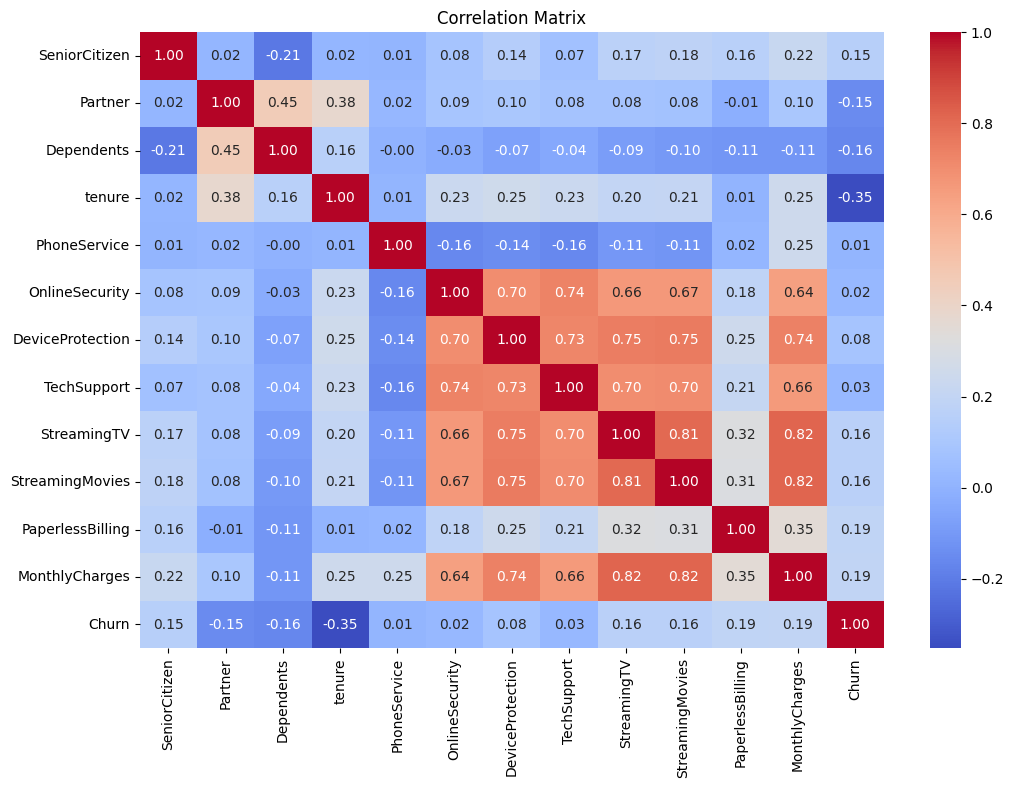

In [10]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

corr = numeric_df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [11]:
corr_target = corr['Churn'].sort_values(ascending=False)
print(corr_target)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
StreamingTV         0.164673
StreamingMovies     0.163220
SeniorCitizen       0.150889
DeviceProtection    0.084654
TechSupport         0.027037
OnlineSecurity      0.023309
PhoneService        0.011942
Partner            -0.150448
Dependents         -0.164221
tenure             -0.352229
Name: Churn, dtype: float64


# Dividing Date

In [12]:
X = df[['tenure', 'MonthlyCharges', 'PaperlessBilling', 'Partner', 'Dependents', 'SeniorCitizen', 'StreamingTV', 'StreamingMovies']]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# some visualizations

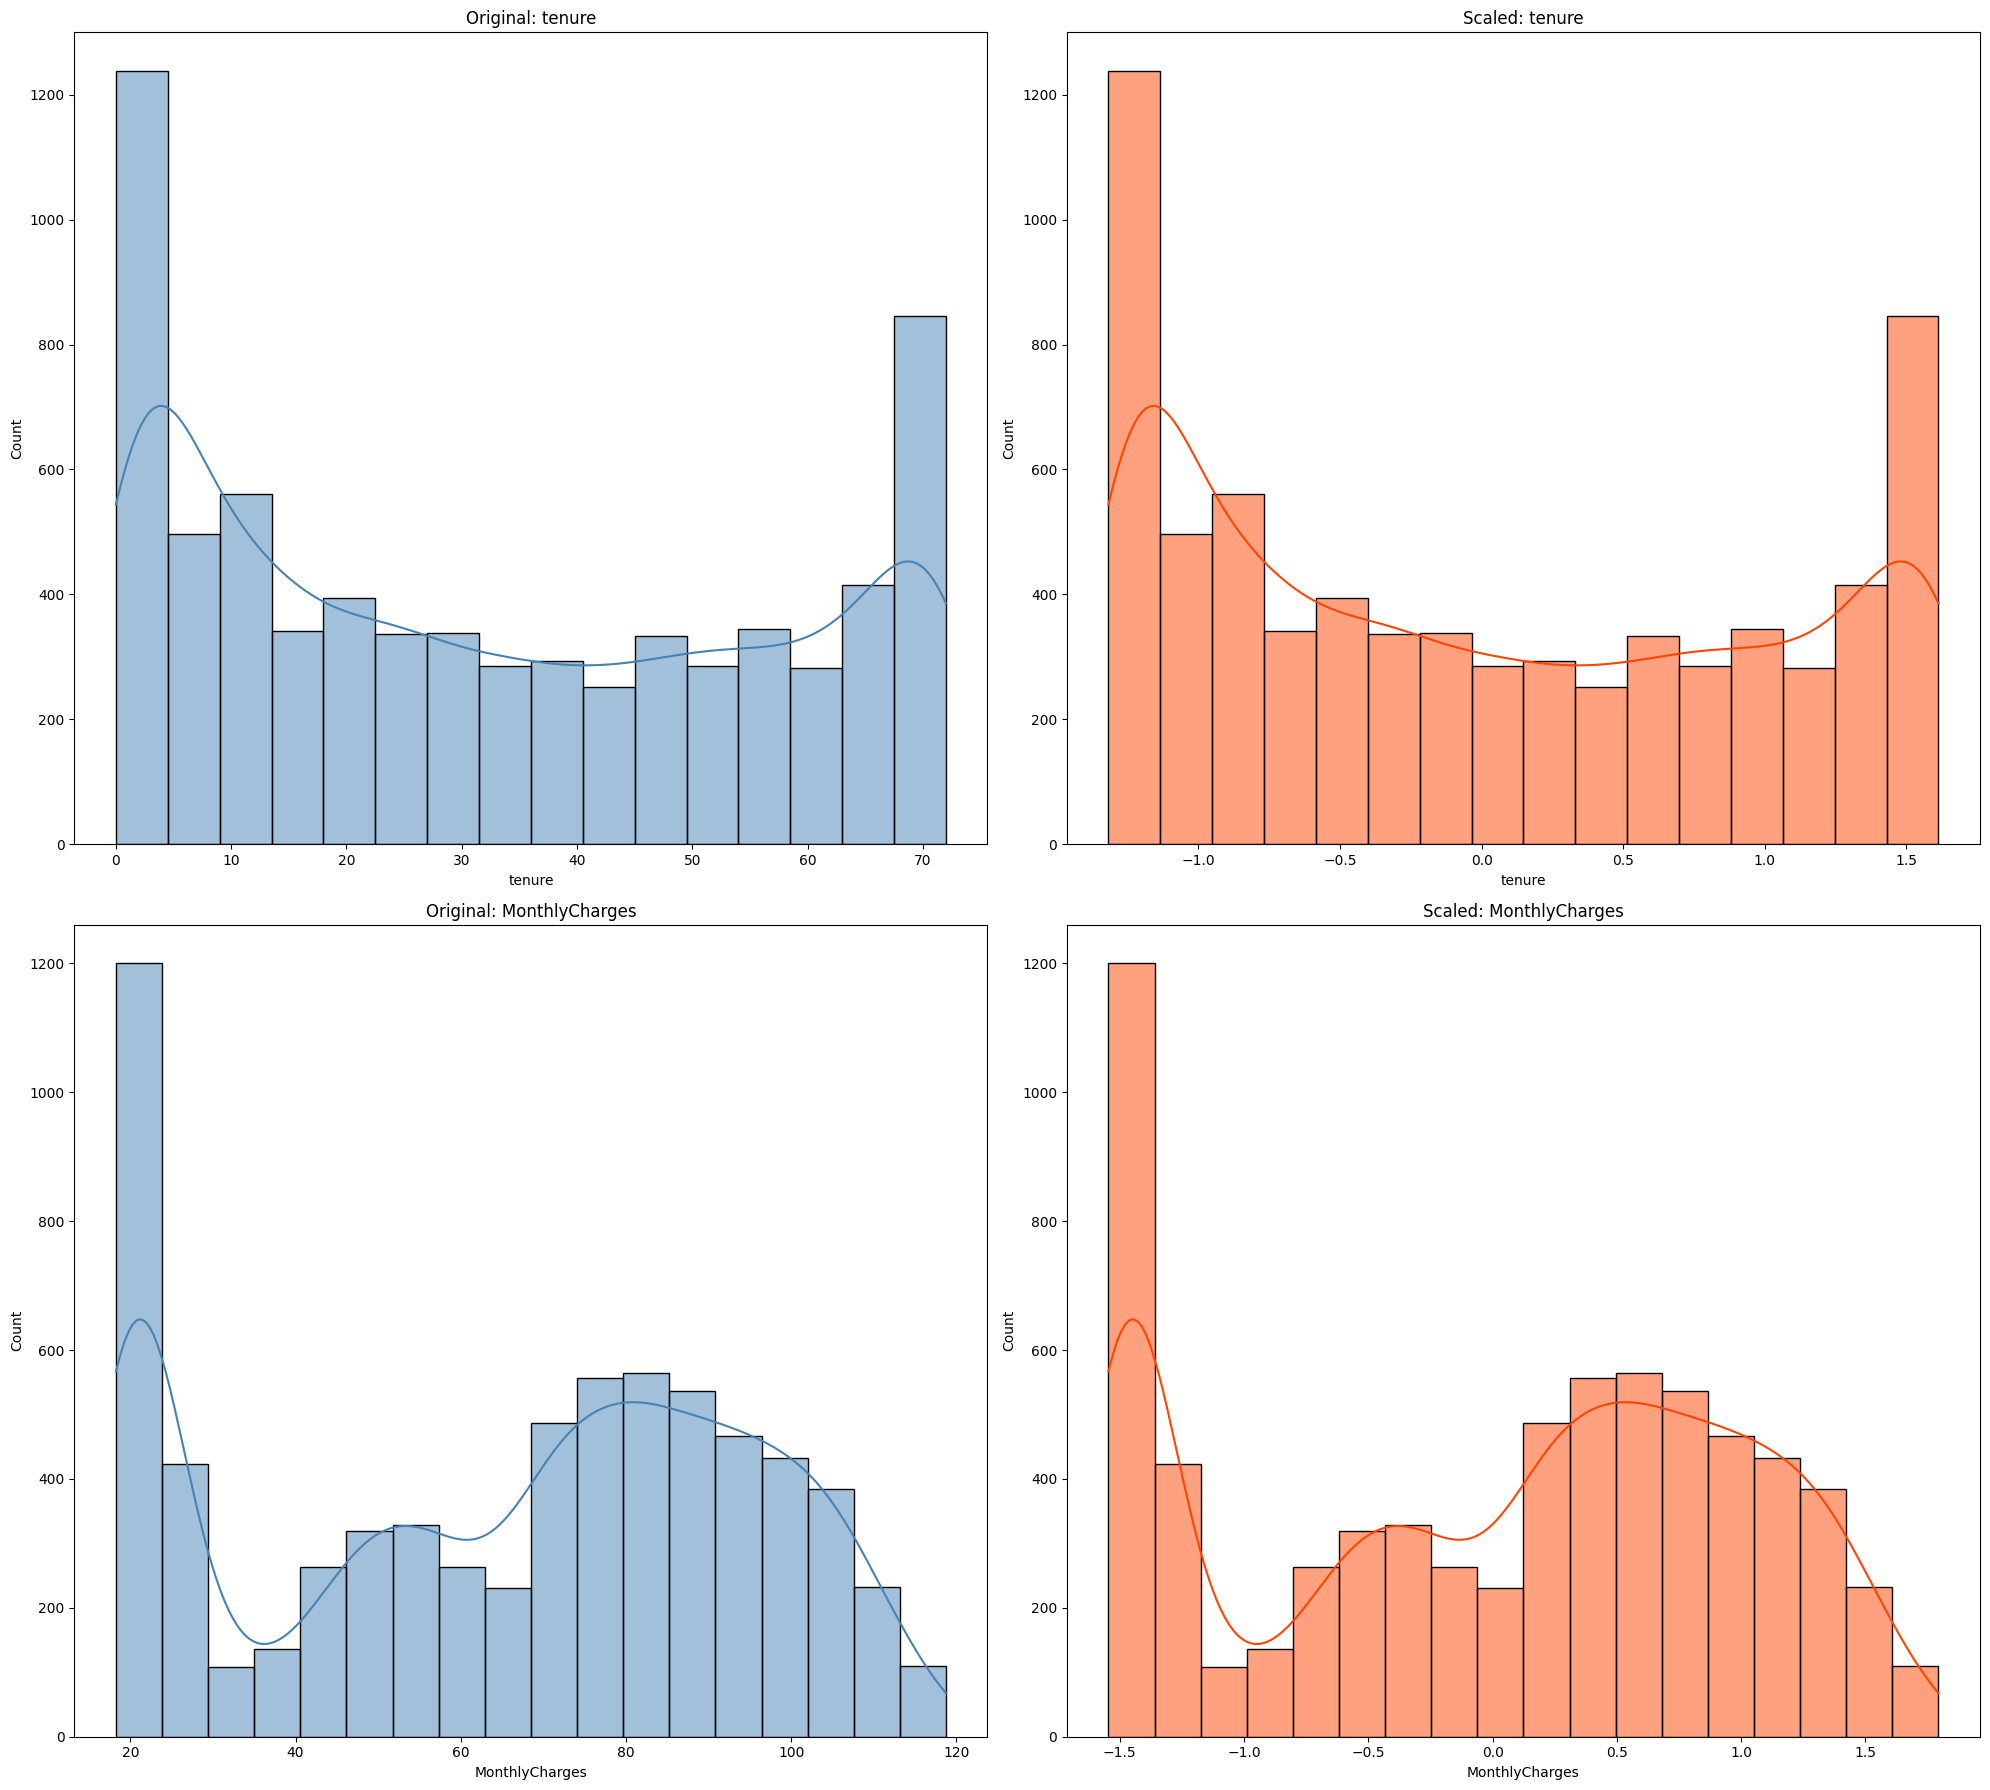

In [13]:
features = ['tenure', 'MonthlyCharges']

X = df[features].copy()

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=features)

plt.figure(figsize=(20, 18))

for i, feature in enumerate(features):
    plt.subplot(len(features), 2, 2*i + 1)
    sns.histplot(X[feature], kde=True, color='steelblue')
    plt.title(f'Original: {feature}')

    plt.subplot(len(features), 2, 2*i + 2)
    sns.histplot(X_scaled[feature], kde=True, color='orangered')
    plt.title(f'Scaled: {feature}')

plt.tight_layout()
plt.show()

-------------------------------------------------------------------------------------------------------------

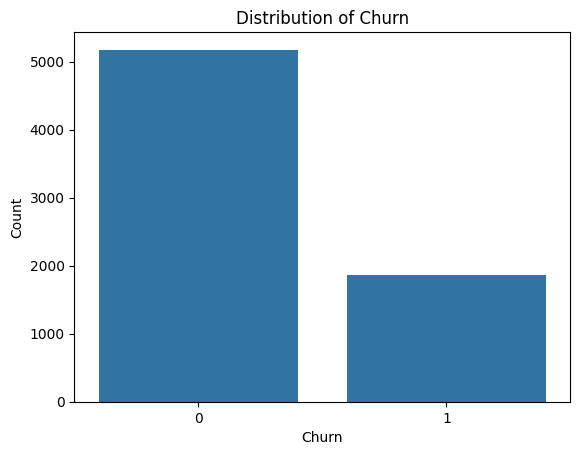

In [14]:
sns.countplot(x=y)
plt.title("Distribution of Churn")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

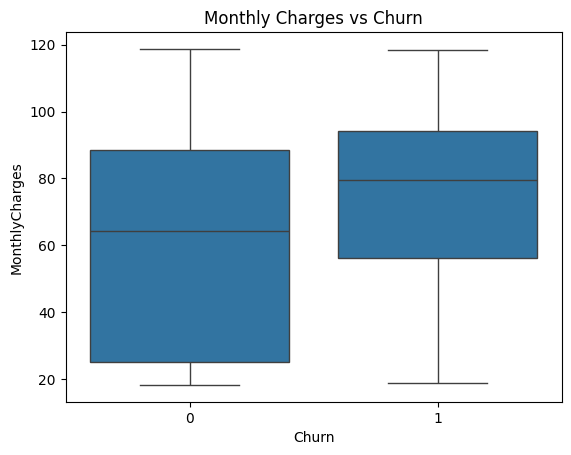

In [15]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

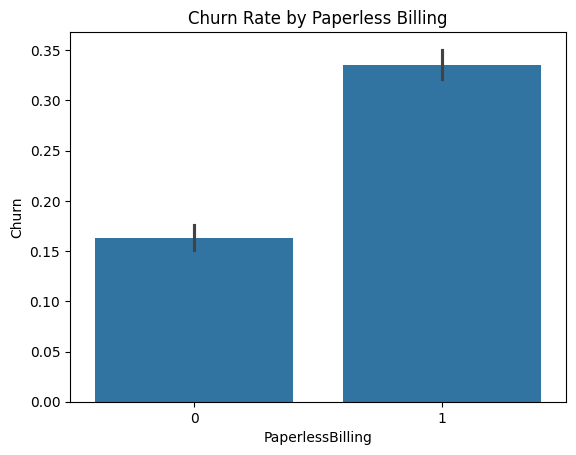

In [16]:
sns.barplot(x='PaperlessBilling', y='Churn', data=df)
plt.title("Churn Rate by Paperless Billing")
plt.show()

# Model 1: Logistic Regression

Best Threshold: 0.61
Precision: 0.57
Recall: 0.70
F1-Score: 0.63

Accuracy: 0.7780407004259347

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.84      1539
           1       0.57      0.70      0.63       574

    accuracy                           0.78      2113
   macro avg       0.73      0.75      0.74      2113
weighted avg       0.80      0.78      0.78      2113



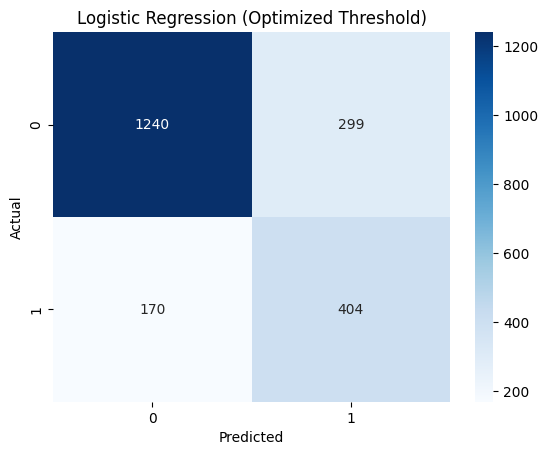

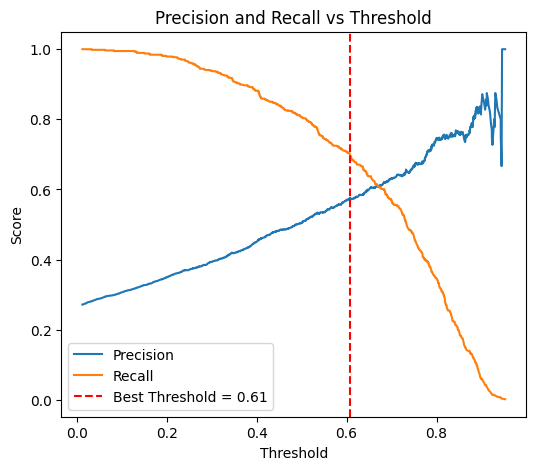

In [17]:
log_model = LogisticRegression(max_iter=1000, class_weight={0:1, 1:3})
log_model.fit(X_train, y_train)

y_proba = log_model.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print(f"Best Threshold: {best_threshold:.2f}")
print(f"Precision: {precisions[best_idx]:.2f}")
print(f"Recall: {recalls[best_idx]:.2f}")
print(f"F1-Score: {f1_scores[best_idx]:.2f}")

y_pred_custom = (y_proba >= best_threshold).astype(int)

print("\nAccuracy:", accuracy_score(y_test, y_pred_custom))
print("\nClassification Report:\n", classification_report(y_test, y_pred_custom))

cm = confusion_matrix(y_test, y_pred_custom)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Logistic Regression (Optimized Threshold)")
plt.show()

plt.figure(figsize=(6,5))
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.axvline(x=best_threshold, color='red', linestyle='--', label=f'Best Threshold = {best_threshold:.2f}')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs Threshold")
plt.legend()
plt.show()

# Model 2: Decision Tree

Best Threshold: 0.57
Precision: 0.51
Recall: 0.77
F1-Score: 0.61

Accuracy: 0.735447231424515

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.72      0.80      1539
           1       0.51      0.77      0.61       574

    accuracy                           0.74      2113
   macro avg       0.70      0.75      0.71      2113
weighted avg       0.79      0.74      0.75      2113



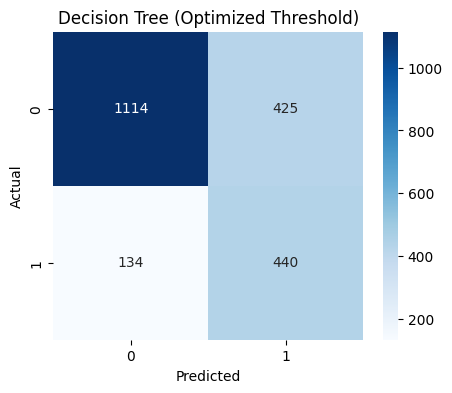

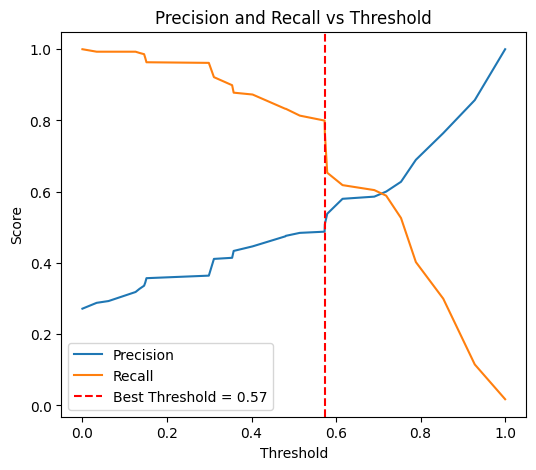

In [18]:
dt_model = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight={0: 1, 1: 3},  # کلاس 1 مهم‌تر
    random_state=42
)
dt_model.fit(X_train, y_train)

y_proba_dt = dt_model.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba_dt)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print(f"Best Threshold: {best_threshold:.2f}")
print(f"Precision: {precisions[best_idx]:.2f}")
print(f"Recall: {recalls[best_idx]:.2f}")
print(f"F1-Score: {f1_scores[best_idx]:.2f}")

y_pred_dt_custom = (y_proba_dt >= best_threshold).astype(int)

print("\nAccuracy:", accuracy_score(y_test, y_pred_dt_custom))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt_custom))

cm = confusion_matrix(y_test, y_pred_dt_custom)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree (Optimized Threshold)")
plt.show()

plt.figure(figsize=(6,5))
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.axvline(x=best_threshold, color='red', linestyle='--', label=f'Best Threshold = {best_threshold:.2f}')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs Threshold")
plt.legend()
plt.show()

Model expects: 8 features
Provided feature names: 8


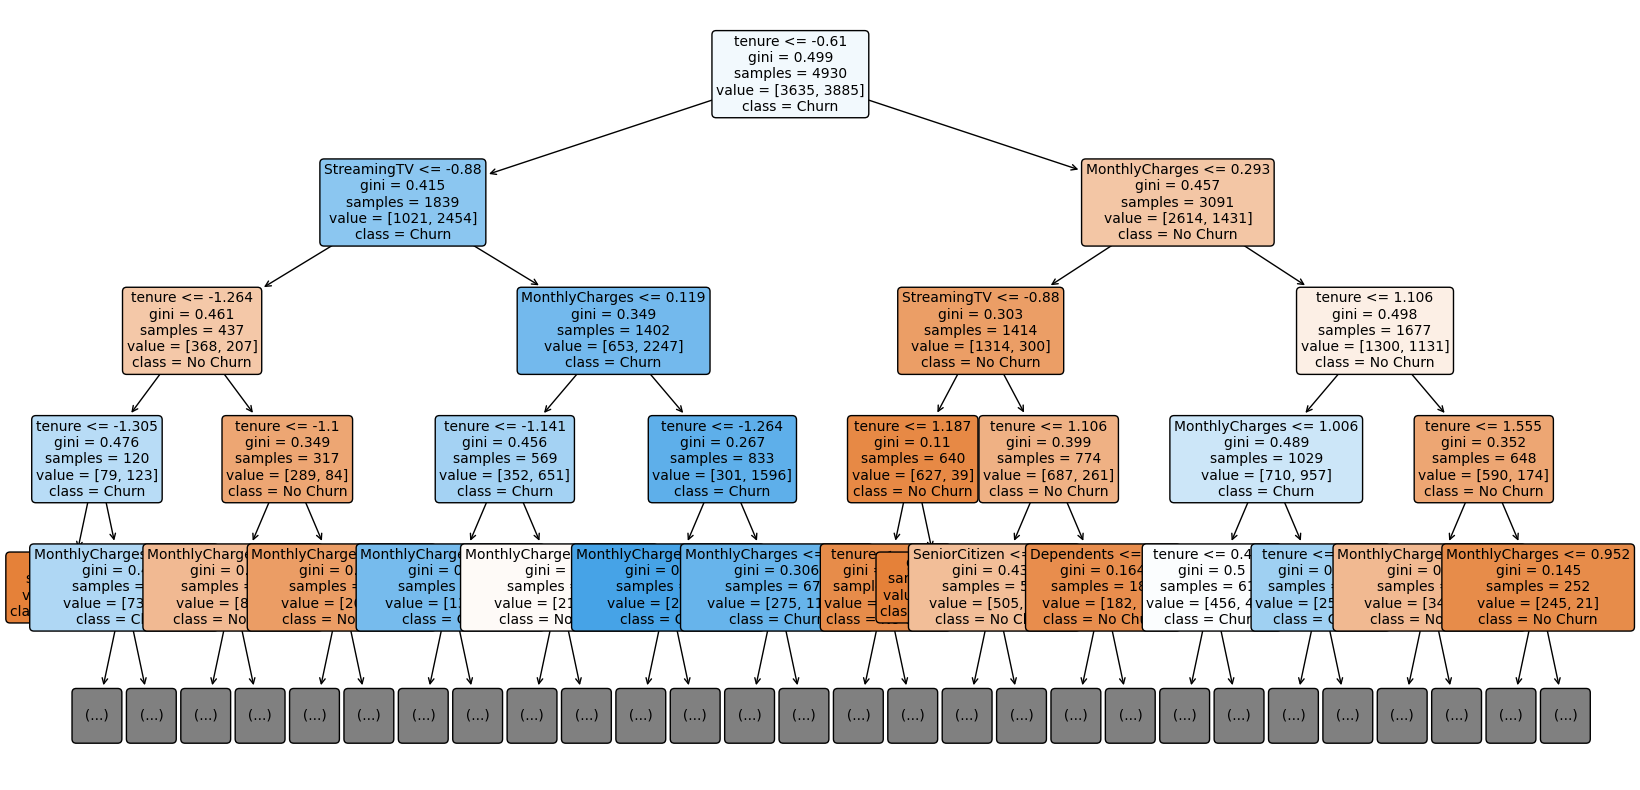

In [19]:
features = ['tenure','MonthlyCharges','PaperlessBilling',
            'Partner','Dependents','SeniorCitizen',
            'StreamingTV','StreamingMovies']

feature_names = features.copy()

print("Model expects:", dt_model.n_features_in_, "features")
print("Provided feature names:", len(feature_names))

assert dt_model.n_features_in_ == len(feature_names), (
    f"Mismatch: model expects {dt_model.n_features_in_} features but got {len(feature_names)}"
)

plt.figure(figsize=(20,10))
plot_tree(dt_model,
          feature_names=feature_names,
          class_names=['No Churn','Churn'],
          filled=True,
          rounded=True,
          fontsize=10,
          max_depth=4)
plt.show()

# Model 3: Random Forest

Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.90      0.74      0.81      1539
       Churn       0.53      0.78      0.63       574

    accuracy                           0.75      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.80      0.75      0.76      2113



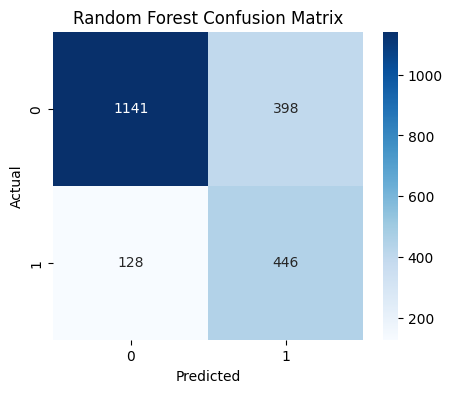

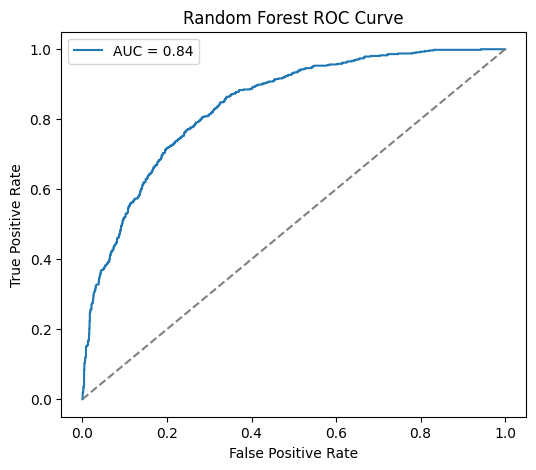

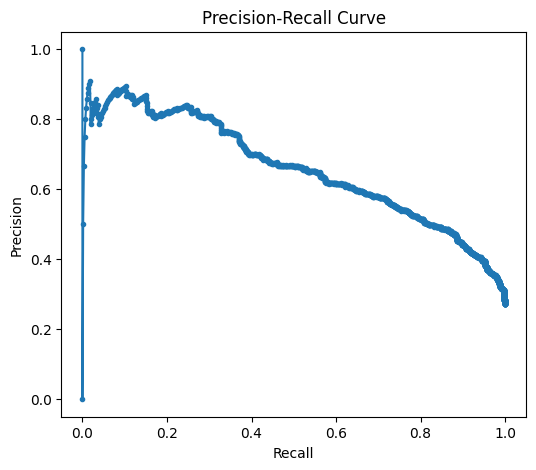

In [20]:
# 1) تعریف مدل
rf_model = RandomForestClassifier(
    n_estimators=200,         # تعداد درخت‌ها
    max_depth=8,             # عمق حداکثر هر درخت
    min_samples_split=10,    # حداقل نمونه برای تقسیم یک گره
    min_samples_leaf=5,      # حداقل نمونه در هر برگ
    class_weight={0: 1, 1: 3}, # برای مقابله با عدم‌تعادل داده‌ها (مثل مقاله)
    random_state=42,
    n_jobs=-1
)

# 2) آموزش مدل
rf_model.fit(X_train, y_train)

# 3) پیش‌بینی
y_pred_rf = rf_model.predict(X_test)

# 4) ارزیابی اولیه (Accuracy + Report + Confusion Matrix)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['No Churn', 'Churn']))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

# 5) بررسی ROC Curve و AUC
y_pred_prob = rf_model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC Curve")
plt.legend()
plt.show()

# 6) Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

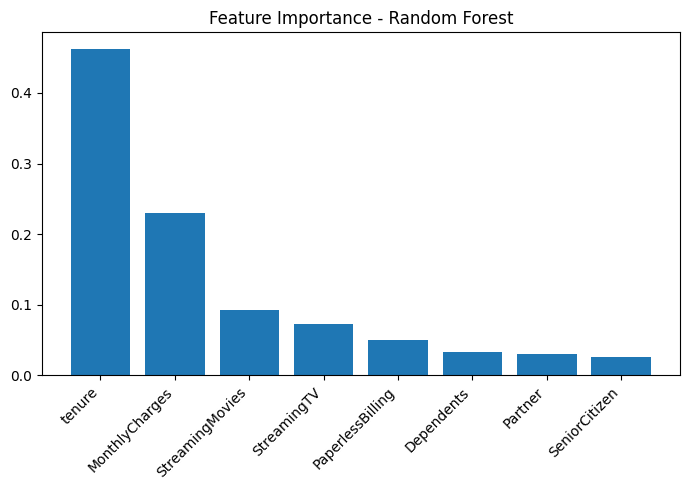

In [21]:
importances = rf_model.feature_importances_
n_features = importances.shape[0]
idx = np.argsort(importances)[::-1]

feature_names = None

try:
    candidate_names = list(X.columns)
    if len(candidate_names) == n_features:
        feature_names = np.array(candidate_names)
except Exception:
    pass

if feature_names is None:
    manual_names = ['tenure','MonthlyCharges','PaperlessBilling',
                    'Partner','Dependents','SeniorCitizen',
                    'StreamingTV','StreamingMovies']
    if len(manual_names) == n_features:
        feature_names = np.array(manual_names)

if feature_names is None:
    feature_names = np.array([f'feature_{i}' for i in range(n_features)])

sorted_names = feature_names[idx]
sorted_vals  = importances[idx]

plt.figure(figsize=(7,5))
plt.title("Feature Importance - Random Forest")
plt.bar(range(n_features), sorted_vals, align="center")
plt.xticks(range(n_features), sorted_names, rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Model 4: SVM

Accuracy: 0.72

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.91      0.69      0.79      1539
       Churn       0.50      0.80      0.61       574

    accuracy                           0.72      2113
   macro avg       0.70      0.75      0.70      2113
weighted avg       0.79      0.72      0.74      2113



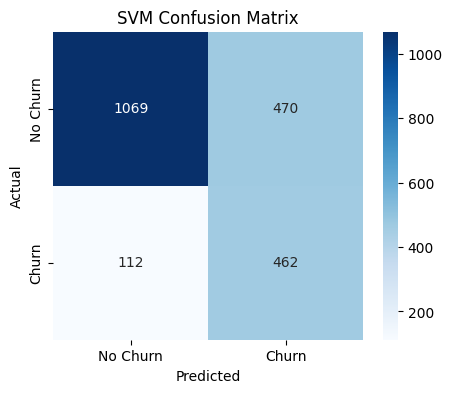

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# تعریف مدل SVM
svm_model = SVC(
    kernel='rbf',          # کرنل RBF که معمولا بهترین نتیجه رو در دیتاست‌های غیرخطی میده
    C=1.0,                 # پارامتر کنترل خطا (مقدار بیشتر یعنی خطای کمتر ولی پیچیدگی بیشتر)
    gamma='scale',         # گاما برای کرنل RBF (scale یعنی به طور خودکار محاسبه میشه)
    class_weight={0:1, 1:3}, # وزن‌دهی بیشتر به کلاس "Churn" برای مقابله با عدم‌توازن
    random_state=42
)

# آموزش مدل
svm_model.fit(X_train, y_train)

# پیش‌بینی روی داده تست
y_pred_svm = svm_model.predict(X_test)

# محاسبه دقت
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy_svm:.2f}")

# گزارش کامل طبقه‌بندی
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm, target_names=['No Churn', 'Churn']))

# رسم ماتریس درهم‌ریختگی
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()

## 🔎 Steps Performed

### 1. Data Loading & Exploration
- Loaded dataset with Pandas.
- Checked shape, datatypes, and missing values.
- Performed descriptive statistics.

### 2. Data Cleaning
- Converted binary categorical variables (Yes/No) into numerical format.
- Encoded categorical features using label/one-hot encoding.
- Handled missing values.

### 3. Exploratory Data Analysis (EDA)
- Visualized churn distribution.
- Explored correlations between churn and:
  - Contract type  
  - Internet service  
  - Payment method  
  - Monthly charges  

### 4. Feature Engineering
- Selected important features based on correlation analysis.
- Scaled numerical variables where necessary.

### 5. Modeling
- Applied multiple classification models:
  - Logistic Regression  
  - Decision Tree  
  - Random Forest  
  - (Any other you tried)  
- Compared performance based on accuracy, precision, recall, and F1-score.

### 6. Results & Evaluation
- Identified the most influential features for churn.  
- Best-performing model: **(write your best model here, e.g. Random Forest with 82% accuracy)**  
- Customers with **month-to-month contracts** and **higher monthly charges** were more likely to churn.

---

## ✅ Conclusion
- Churn prediction is possible with good accuracy using machine learning models.  
- The most important drivers of churn are **contract type, tenure, and monthly charges**.  
- Businesses can reduce churn by offering discounts or long-term contracts to at-risk customers.  

---

## 🚀 How to Run
1. Clone this repository or open the notebook in Kaggle.
2. Install required libraries:
   ```bash
   pip install pandas numpy matplotlib seaborn scikit-learn
